### Imports

In [ ]:
import config

In [ ]:
import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import IFrame
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import pickle


### Scraping

In [2]:
import requests


url = "https://www.billboard.com/charts/hot-100/"
response = requests.get(url)
response

<Response [200]>

b'<!DOCTYPE html>\n<!--[if IE 6]>\n<html id="ie6" lang="en-US">\n<![endif]-->\n<!--[if IE 7]>\n<html id="ie7" lang="en-US">\n<![endif]-->\n<!--[if IE 8]>\n<html id="ie8" lang="en-US">\n<![endif]-->\n<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->\n<html lang="en-US">\n<!--<![endif]-->\n<head>\n\t<meta charset="UTF-8"/>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t<meta name="theme-color" content="#ffffff">\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0"/>\t\n<!-- Add to home screen for iOS -->\n<meta name="apple-mobile-web-app-status-bar-style" content="black-translucent">\n<link rel="apple-touch-icon" sizes="180x180" href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png">\n\n<!-- Tile icons for Windows -->\n<meta name="msapplication-config" content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml">\n<meta name="msapplication-TileImage" c
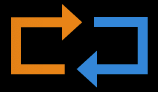

In [3]:
response.content

In [4]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.content)

<!DOCTYPE html>
<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <!-- Add to home screen for iOS -->
  <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
  <link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <!-- Tile icons for Windows -->
  <meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
  <meta content="https://www.billboard.com/wp-cont
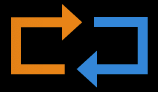

In [5]:
print(soup.prettify()) 


In [6]:
song_data = []
for i in soup.select("ul li h3.a-no-trucate.a-font-primary-bold-s"):
    song_data.append(i.get_text().strip())
song_data

['Luther',
 'Die With A Smile',
 'Not Like Us',
 'TV Off',
 'A Bar Song (Tipsy)',
 'APT.',
 'Birds Of A Feather',
 'Pink Pony Club',
 'Lose Control',
 'Nokia',
 "That's So True",
 'Beautiful Things',
 'Love Somebody',
 'Squabble Up',
 'I Had Some Help',
 '30 For 30',
 "I'm The Problem",
 'Espresso',
 'Timeless',
 'Messy',
 'Sports Car',
 'Denial Is A River',
 'Taste',
 'Too Sweet',
 'Revolving Door',
 'All The Stars',
 'Good Luck, Babe!',
 'Stargazing',
 'Abracadabra',
 'DTMF',
 'Liar',
 'Bed Chem',
 'High Road',
 'Die Trying',
 'Sailor Song',
 'I Never Lie',
 'BMF',
 'Gimme A Hug',
 "I'm Gonna Love You",
 'No One Noticed',
 'Who',
 'Baile Inolvidable',
 'Please Please Please',
 "Sorry I'm Here For Someone Else",
 'A N X I E T Y',
 'Peekaboo',
 'Whatchu Kno About Me',
 'Wildflower',
 'Indigo',
 'Smile',
 'Residuals',
 'Sticky',
 'Cry For Me',
 'Bad Dreams',
 'Good News',
 'Ms. Whitman',
 'Tweaker',
 "I Ain't Sayin'",
 'Mutt',
 'Worst Way',
 'Busy Woman',
 'Somebody Loves Me',
 'Loco',


In [7]:
artist = []
for i in soup.select("ul li span.c-label.a-no-trucate.a-font-primary-s"):
    artist.append(i.get_text().strip())
artist

['Kendrick Lamar & SZA',
 'Lady Gaga & Bruno Mars',
 'Kendrick Lamar',
 'Kendrick Lamar Featuring Lefty Gunplay',
 'Shaboozey',
 'ROSE & Bruno Mars',
 'Billie Eilish',
 'Chappell Roan',
 'Teddy Swims',
 'Drake',
 'Gracie Abrams',
 'Benson Boone',
 'Morgan Wallen',
 'Kendrick Lamar',
 'Post Malone Featuring Morgan Wallen',
 'SZA With Kendrick Lamar',
 'Morgan Wallen',
 'Sabrina Carpenter',
 'The Weeknd & Playboi Carti',
 'Lola Young',
 'Tate McRae',
 'Doechii',
 'Sabrina Carpenter',
 'Hozier',
 'Tate McRae',
 'Kendrick Lamar & SZA',
 'Chappell Roan',
 'Myles Smith',
 'Lady Gaga',
 'Bad Bunny',
 'Jelly Roll',
 'Sabrina Carpenter',
 'Koe Wetzel & Jessie Murph',
 'PARTYNEXTDOOR, Drake & Yebba',
 'Gigi Perez',
 'Zach Top',
 'SZA',
 'Drake',
 'Cody Johnson & Carrie Underwood',
 'The Marias',
 'Jimin',
 'Bad Bunny',
 'Sabrina Carpenter',
 'Benson Boone',
 'Sleepy Hallow Featuring Doechii',
 'Kendrick Lamar Featuring AzChike',
 'GloRilla & Sexyy Red',
 'Billie Eilish',
 'Sam Barber Featuring A

In [8]:
import pandas as pd 
top100_dict = {"Title":song_data, "Artist": artist}
top100=pd.DataFrame(top100_dict)
top100

Title                                  Artist
0               Luther                    Kendrick Lamar & SZA
1     Die With A Smile                  Lady Gaga & Bruno Mars
2          Not Like Us                          Kendrick Lamar
3               TV Off  Kendrick Lamar Featuring Lefty Gunplay
4   A Bar Song (Tipsy)                               Shaboozey
..                 ...                                     ...
95          Born Again          LISA Featuring Doja Cat & RAYE
96            Twenties                                  Giveon
97              Deeper                           PARTYNEXTDOOR
98         Holy Smokes                        Bailey Zimmerman
99              7 Dias      Gabito Ballesteros & Tito Double P

[100 rows x 2 columns]

### dataset 

In [14]:
file = "/Users/catherinewu/Downloads/spotify_project/audio_features_dataset.csv"
df = pd.read_csv(file)
df

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  
0               0.000001    0.3580   0.7150   87.917               4  
1               0.000006    0.1010   0.2670   77.489               4  
2               0.000000    0.1170   0.1200   76.332               4  
3               0.000071    0.1320   0.1430  181.740               3  
4               0.000000    0.0829   0.1670  119.949               4  
...                  ...       ...      ...      ...             ...  
113995          0.928000    0.0863   0.0339  125.995               5  
113996          0.976000    

In [15]:
df.shape

(114000, 20)

In [16]:
df = df.drop(columns = ['Unnamed: 0', 'album_name', 'duration_ms', 'explicit', 'time_signature'], axis=1)

In [17]:
df = df.dropna()

In [18]:
df = df.drop_duplicates()

In [19]:
df = df.drop_duplicates(subset='track_id', keep='first')

In [20]:
df.shape

(89740, 15)

In [184]:
### from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Drop non-relevant columns (CustomerID)
scale_df = df[['mode', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] #df used for clustering 

#Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(scale_df)

# Convert scaled data into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=scale_df.columns)

# Show the scaled data
scaled_df

mode  danceability    energy       key  loudness  speechiness  \
0     -1.324621      0.644253 -0.675975 -1.203275  0.335727     0.490458   
1      0.754933     -0.804604 -1.825602 -1.203275 -1.673087    -0.098364   
2      0.754933     -0.702731 -1.073473 -1.484183 -0.236524    -0.280219   
3      0.754933     -1.676182 -2.240247 -1.484183 -1.918228    -0.451480   
4      0.754933      0.315996 -0.746122 -0.922368 -0.226373    -0.307585   
...         ...           ...       ...       ...       ...          ...   
89735  0.754933     -2.208184 -1.556706 -0.079646 -1.511831    -0.399395   
89736 -1.324621     -2.196865 -2.016557 -1.484183 -1.880499    -0.417934   
89737 -1.324621      0.378251 -1.190384 -1.484183 -0.458874    -0.401161   
89738  0.754933      0.140548 -0.500608  0.482169 -0.457725    -0.509744   
89739 -1.324621     -0.204687 -0.574652 -1.203275 -0.326536    -0.131910   

       acousticness  instrumentalness  liveness   valence     tempo  
0         -0.875166         -0.535482  0.723656  0.934047 -1.133599  
1          1.760810         -0.535468 -0.595078 -0.770269 -1.479843  
2         -0.349626         -0.535485 -0.512978 -1.329497 -1.518259  
3          1.704650         -0.535266 -0.436009 -1.241999  1.981635  
4          0.415925         -0.535485 -0.687954 -1.150696 -0.070030  
...             ...               ...       ...       ...       ...  
89735      0.921365          2.330062 -0.670508 -1.657046  0.130717  
89736      1.967716          2.478280 -0.574553 -1.652861 -1.222517  
89737      1.592330         -0.535485 -0.682823  1.040567  0.342654  
89738      0.155815         -0.535485  0.272105 -0.214844  0.461588  
89739      1.042553         -0.535485 -0.655114  0.907417 -1.423098  

[89740 rows x 11 columns]

### Scores - Silohouette and Elbow

In [186]:

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(scaled_df)

# Compute the Silhouette Score
sil_score = silhouette_score(scaled_df, labels)
print(f"Silhouette Score: {sil_score}")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.14325910815347367


In [ ]:
scaled_df_revised = scaled_df.drop(columns = ['Unnamed: 0', 'album_name', 'duration_ms', 'explicit', 'time_signature'], axis=1)

In [ ]:

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(scaled_df)

# Compute the Silhouette Score
sil_score = silhouette_score(scaled_df, labels)
print(f"Silhouette Score: {sil_score}")


In [ ]:

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(scaled_df)

# Compute the Silhouette Score
sil_score = silhouette_score(scaled_df, labels)
print(f"Silhouette Score: {sil_score}")


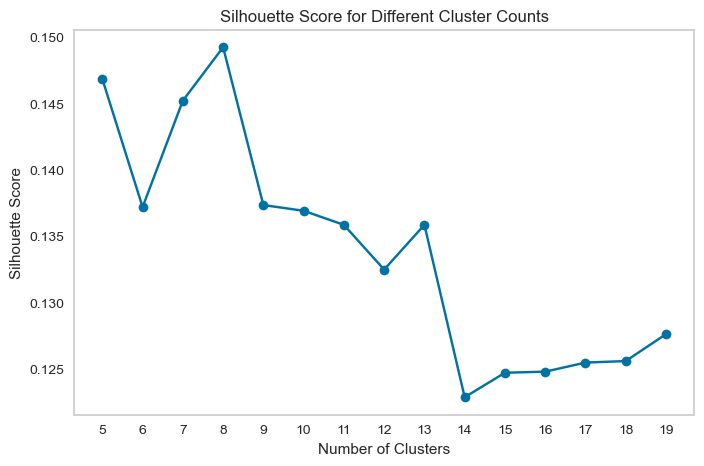

In [187]:
cluster_range = range(5, 20)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=5, random_state=45)
    cluster_labels = kmeans.fit_predict(scaled_df)
    #pickling
    filename = "kmeans_" + str(n_clusters) + ".pickle"
    
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
        
    score = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Counts")
plt.xticks(cluster_range)
plt.grid()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/

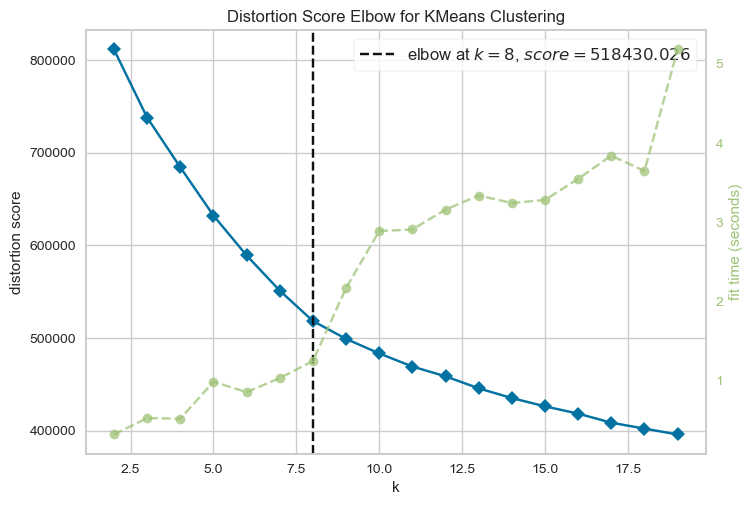

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [193]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Define the model
model = KMeans()

# Define the visualizer with the desired range for k (number of clusters)
visualizer = KElbowVisualizer(model, k=(2, 20))

# Fit the visualizer with your scaled data
visualizer.fit(scaled_df)

# Show the elbow plot
visualizer.show()


In [194]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

### Clustering

In [197]:
kmeans8 = load("kmeans_8.pickle")

In [199]:
pred = kmeans8.predict(scaled_df)

In [201]:
scaled_df['cluster'] = pd.Series(pred)

In [217]:
scaled_df.dtypes

mode                float64
danceability        float64
energy              float64
key                 float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
cluster               int32
dtype: object

In [219]:
scaled_df

mode  danceability    energy       key  loudness  speechiness  \
0     -1.324621      0.644253 -0.675975 -1.203275  0.335727     0.490458   
1      0.754933     -0.804604 -1.825602 -1.203275 -1.673087    -0.098364   
2      0.754933     -0.702731 -1.073473 -1.484183 -0.236524    -0.280219   
3      0.754933     -1.676182 -2.240247 -1.484183 -1.918228    -0.451480   
4      0.754933      0.315996 -0.746122 -0.922368 -0.226373    -0.307585   
...         ...           ...       ...       ...       ...          ...   
89735  0.754933     -2.208184 -1.556706 -0.079646 -1.511831    -0.399395   
89736 -1.324621     -2.196865 -2.016557 -1.484183 -1.880499    -0.417934   
89737 -1.324621      0.378251 -1.190384 -1.484183 -0.458874    -0.401161   
89738  0.754933      0.140548 -0.500608  0.482169 -0.457725    -0.509744   
89739 -1.324621     -0.204687 -0.574652 -1.203275 -0.326536    -0.131910   

       acousticness  instrumentalness  liveness   valence     tempo  cluster  
0         -0.875166         -0.535482  0.723656  0.934047 -1.133599        1  
1          1.760810         -0.535468 -0.595078 -0.770269 -1.479843        4  
2         -0.349626         -0.535485 -0.512978 -1.329497 -1.518259        4  
3          1.704650         -0.535266 -0.436009 -1.241999  1.981635        4  
4          0.415925         -0.535485 -0.687954 -1.150696 -0.070030        4  
...             ...               ...       ...       ...       ...      ...  
89735      0.921365          2.330062 -0.670508 -1.657046  0.130717        2  
89736      1.967716          2.478280 -0.574553 -1.652861 -1.222517        2  
89737      1.592330         -0.535485 -0.682823  1.040567  0.342654        4  
89738      0.155815         -0.535485  0.272105 -0.214844  0.461588        4  
89739      1.042553         -0.535485 -0.655114  0.907417 -1.423098        4  

[89740 rows x 12 columns]

In [207]:
df_info = df.drop(columns=scale_df.columns)
df_info = df_info.reset_index(drop=True)
df_info

track_id                 artists  \
0      5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1      4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2      1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3      6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4      5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                       ...                     ...   
89735  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
89736  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
89737  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
89738  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
89739  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                       track_name  popularity  
0                          Comedy          73  
1                Ghost - Acoustic          55  
2                  To Begin Again          57  
3      Can't Help Falling In Love          71  
4                         Hold On          82  
...                           ...         ...  
89735         Sleep My Little Boy          21  
89736            Water Into Light          22  
89737              Miss Perfumado          22  
89738                     Friends          41  
89739                   Barbincor          22  

[89740 rows x 4 columns]

In [279]:
df_combined = pd.concat([df_info, scaled_df], axis=1)
df_combined


track_id                 artists  \
0      5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1      4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2      1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3      6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4      5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                       ...                     ...   
89735  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
89736  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
89737  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
89738  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
89739  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                       track_name  popularity      mode  danceability  \
0                          Comedy          73 -1.324621      0.644253   
1                Ghost - Acoustic          55  0.754933     -0.804604   
2                  To Begin Again          57  0.754933     -0.702731   
3      Can't Help Falling In Love          71  0.754933     -1.676182   
4                         Hold On          82  0.754933      0.315996   
...                           ...         ...       ...           ...   
89735         Sleep My Little Boy          21  0.754933     -2.208184   
89736            Water Into Light          22 -1.324621     -2.196865   
89737              Miss Perfumado          22 -1.324621      0.378251   
89738                     Friends          41  0.754933      0.140548   
89739                   Barbincor          22 -1.324621     -0.204687   

         energy       key  loudness  speechiness  acousticness  \
0     -0.675975 -1.203275  0.335727     0.490458     -0.875166   
1     -1.825602 -1.203275 -1.673087    -0.098364      1.760810   
2     -1.073473 -1.484183 -0.236524    -0.280219     -0.349626   
3     -2.240247 -1.484183 -1.918228    -0.451480      1.704650   
4     -0.746122 -0.922368 -0.226373    -0.307585      0.415925   
...         ...       ...       ...          ...           ...   
89735 -1.556706 -0.079646 -1.511831    -0.399395      0.921365   
89736 -2.016557 -1.484183 -1.880499    -0.417934      1.967716   
89737 -1.190384 -1.484183 -0.458874    -0.401161      1.592330   
89738 -0.500608  0.482169 -0.457725    -0.509744      0.155815   
89739 -0.574652 -1.203275 -0.326536    -0.131910      1.042553   

       instrumentalness  liveness   valence     tempo  cluster  
0             -0.535482  0.723656  0.934047 -1.133599        1  
1             -0.535468 -0.595078 -0.770269 -1.479843        4  
2             -0.535485 -0.512978 -1.329497 -1.518259        4  
3             -0.535266 -0.436009 -1.241999  1.981635        4  
4             -0.535485 -0.687954 -1.150696 -0.070030        4  
...                 ...       ...       ...       ...      ...  
89735          2.330062 -0.670508 -1.657046  0.130717        2  
89736          2.478280 -0.574553 -1.652861 -1.222517        2  
89737         -0.535485 -0.682823  1.040567  0.342654        4  
89738         -0.535485  0.272105 -0.214844  0.461588        4  
89739         -0.535485 -0.655114  0.907417 -1.423098        4  

[89740 rows x 16 columns]

### EDA

In [247]:
df_combined['cluster'].value_counts()

cluster
5    19804
1    17163
4    15571
7    14361
6     9608
2     6406
0     5786
3     1041
Name: count, dtype: int64

In [225]:
df_combined.dtypes

track_id             object
artists              object
track_name           object
popularity            int64
mode                float64
danceability        float64
energy              float64
key                 float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
cluster               int32
dtype: object

In [229]:
# Calculate mean audio features per cluster
cluster_means = df_combined.groupby("cluster")[["mode", "tempo", "danceability", "energy", 
                                                "valence", "acousticness", "liveness", 
                                                "instrumentalness", "speechiness", "key"]].mean()

# Print the calculated mean values per cluster
print(cluster_means)


             mode     tempo  danceability    energy   valence  acousticness  \
cluster                                                                       
0        0.088225  0.043450     -0.266276  0.456697  0.111217     -0.094905   
1       -1.324621 -0.069707      0.556823  0.330840  0.433312     -0.374464   
2        0.023226 -0.658331     -1.266559 -1.818758 -1.108298      1.576005   
3        0.117683 -0.702355      0.051224  0.159282 -0.104337      1.238689   
4        0.316345 -0.286628     -0.289917 -1.104468 -0.362540      1.154827   
5        0.754933 -0.107060      0.687277  0.293029  0.824805     -0.280050   
6       -0.245668  0.134199      0.150548  0.386434 -0.481232     -0.611244   
7        0.308932  0.779006     -0.731065  0.755252 -0.483093     -0.764025   

         liveness  instrumentalness  speechiness       key  
cluster                                                     
0        2.793713         -0.284911    -0.004217  0.003325  
1       -0.229347         

python(39014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


             mode     tempo  danceability    energy   valence  acousticness  \
cluster                                                                       
0        0.088225  0.043450     -0.266276  0.456697  0.111217     -0.094905   
1       -1.324621 -0.069707      0.556823  0.330840  0.433312     -0.374464   
2        0.023226 -0.658331     -1.266559 -1.818758 -1.108298      1.576005   
3        0.117683 -0.702355      0.051224  0.159282 -0.104337      1.238689   
4        0.316345 -0.286628     -0.289917 -1.104468 -0.362540      1.154827   
5        0.754933 -0.107060      0.687277  0.293029  0.824805     -0.280050   
6       -0.245668  0.134199      0.150548  0.386434 -0.481232     -0.611244   
7        0.308932  0.779006     -0.731065  0.755252 -0.483093     -0.764025   

         liveness  instrumentalness  speechiness       key  
cluster                                                     
0        2.793713         -0.284911    -0.004217  0.003325  
1       -0.229347         

<Figure size 1000x600 with 0 Axes>

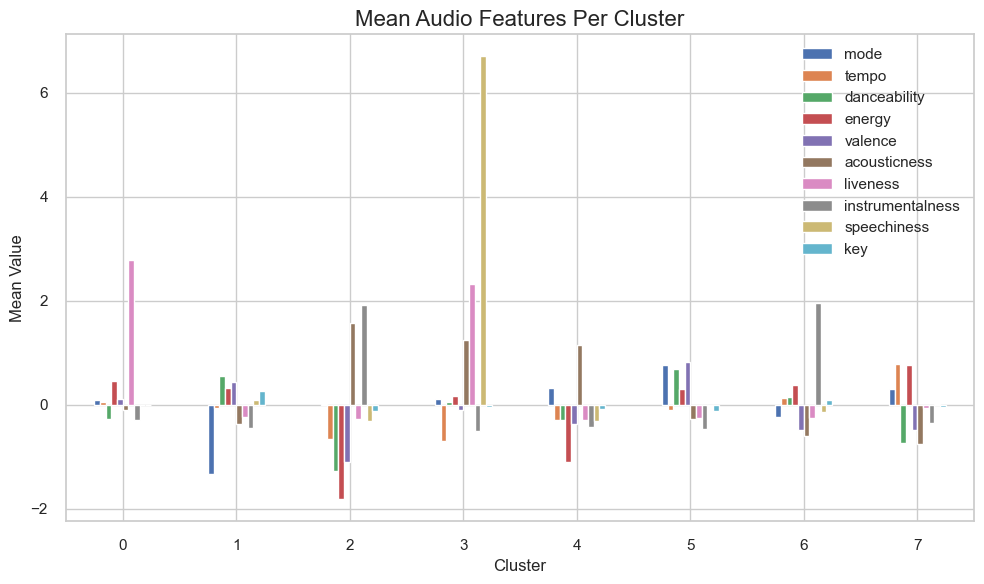

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated cluster_means
cluster_means = df_combined.groupby("cluster")[["mode", "tempo", "danceability", "energy", 
                                                "valence", "acousticness", "liveness", 
                                                "instrumentalness", "speechiness", "key"]].mean()

# Print the calculated means for verification
print(cluster_means)

# Set up the plot
plt.figure(figsize=(10, 6))

# Use seaborn to create a bar plot
sns.set(style="whitegrid")
cluster_means.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Mean Audio Features Per Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


### Recommender

In [297]:
df_combined['cluster'] = df_combined['cluster'].astype(str)

In [371]:
df_combined
df_combined.to_csv('streamlit_combined.csv', index=False)


In [375]:
top100
top100.to_csv('streamlit_top100.csv', index=False)

In [380]:
import random
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import IFrame
# Initialize Spotipy with Client Credentials Flow
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=config.client_id,
                                                           client_secret=config.client_secret))
# Assuming `top100` and `df_combined` are already defined DataFrames
# `top100` has 'Title' and 'Artist' columns
# `df_combined` has 'cluster' and 'track_id' columns

def play_song(track_id):
    # Function to embed the song into the webpage
    return IFrame(src=f"https://open.spotify.com/embed/track/{track_id}",
                  width="320", height="80", frameborder="0",
                  allowtransparency="true", allow="encrypted-media")
    
def fetch_track_id_from_trending(song_title, artist_name):
    # Prepare the search query for Spotify
    search = f"{song_title} - {artist_name}"
    # Search for the song on Spotify
    results = sp.search(q=search, limit=1)
    # Retrieve the track id from the search result
    track_id = results["tracks"]["items"][0]["id"]
    return track_id

def recommender():
    # Dictionary to map genres to cluster numbers (fill this manually)
    genre_to_cluster = {
        "lively": "0",        
        "chill": "1",       
        "calming": "2",    
        "chatty": "3",       
        "dramatic": "4", 
        "upbeat": "5",  
        "instrumental": "6"      
        # Add or modify genres and their corresponding cluster numbers here
    }
    valid_genres = list(genre_to_cluster.keys()) + ["trending"]  # List of valid inputs
    while True:
        # Show available genres to the user
        print(f"What music are you in the mood for: {', '.join(valid_genres)}")
        # Get user input
        user_input = input("Enter a mood for a recommendation: ").strip().lower()
       
        # Case 1: User enters "trending"
        if user_input == "trending":
            # Select a random row from top100
            sample = top100.sample(n=1)
            song_title = sample['Title'].values[0]
            artist_name = sample['Artist'].values[0]
            # Fetch track_id from Spotify using song title and artist
            track_id = fetch_track_id_from_trending(song_title, artist_name)
            # Play the song
            display(play_song(track_id))
        
        # Case 2: User enters a valid genre
        elif user_input in genre_to_cluster:
            # Get the corresponding cluster number from the dictionary
            cluster_number = genre_to_cluster[user_input]
            # Filter df_combined by the chosen cluster
            filtered_df = df_combined[df_combined['cluster'] == cluster_number]
            if not filtered_df.empty:
                # Select a random row
                random_row = filtered_df.sample(n=1)
                track_id = random_row['track_id'].values[0]
                # Play the song
                display(play_song(track_id))
            else:
                print(f"No songs found for the '{user_input}' genre (cluster {cluster_number}). Please try again.")
        
        # Case 3: Invalid input
        else:
            print(f"'{user_input}' is not a valid option. Please choose from the available genres or 'trending'.")
            retry = input("Would you like to try again? (yes/no): ").lower()
            if retry != 'yes':
                print("Thanks for using the recommender! Goodbye.")
                break
            continue  # Skip asking to continue and go back to input
        # Ask if the user wants to continue after a song is played
        continue_input = input("Do you want to select another genre and hear another song? (yes/no): ").lower()
        if continue_input != 'yes':
            print("Thanks for listening! Goodbye.")
            break
# Run the recommender system
recommender()



What music are you in the mood for: lively, chill, calming, chatty, dramatic, upbeat, instrumental, trending


Enter a mood for a recommendation:  calming


KeyboardInterrupt: Interrupted by user